In [162]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import joblib

In [132]:
df = pd.read_csv("diabetes.csv")

In [133]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [134]:
total_diabetes = len(df[df['Outcome'] == 1])
total_tidak_diabetes = len(df[df['Outcome'] == 0])

print(f"Total diabetes : {total_diabetes}")
print(f"Total tidak diabetes : {total_tidak_diabetes}")

Total diabetes : 268
Total tidak diabetes : 499


In [135]:
X = df.loc[:, 'Pregnancies':'Age']
y = df.loc[:, df.columns[-1]]

print(X.shape)
print(y.shape)

(767, 8)
(767,)


In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape {X_train.shape}")
print(f"X_test shape {X_test.shape}")

print(f"y_train shape {y_train.shape}")
print(f"y_test shape {y_test.shape}")

X_train shape (613, 8)
X_test shape (154, 8)
y_train shape (613,)
y_test shape (154,)


In [137]:
# scaller = MinMaxScaler()

# X_train_scaled = scaller.fit_transform(X_train)
# X_test_scaled = scaller.fit_transform(X_train)

In [138]:
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20],
#     'max_features': ['sqrt', 'log2'],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2, 3, 4]
# }

In [139]:
# clf = RandomForestClassifier(random_state=42)

# grid_search = GridSearchCV(clf, param_grid, cv=5, scoring="accuracy")

# grid_search.fit(X_train_scaled, y_train)

# print("Best parameters : ", grid_search.best_params_)
# print("Best score : ", grid_search.best_score_)

In [158]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', RandomForestClassifier(random_state=42, max_depth=None, max_features="sqrt", min_samples_leaf=4, min_samples_split=2, n_estimators=300))
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier',
                 RandomForestClassifier(min_samples_leaf=4, n_estimators=300,
                                        random_state=42))])

In [159]:
y_pred = pipeline.predict(X_test)

In [160]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7662337662337663


In [143]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[86 17]
 [19 32]]


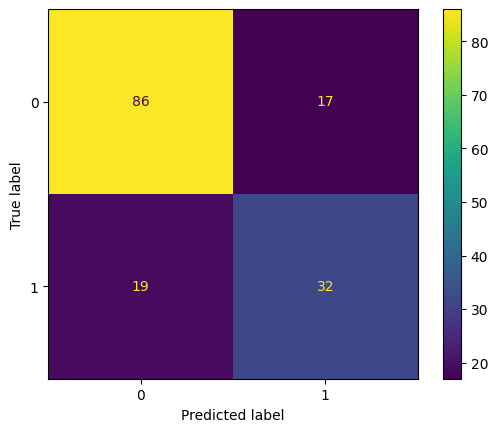

In [145]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot()
plt.show()

In [163]:
joblib.dump(pipeline, "diabetes.plk")

['diabetes.plk']

In [171]:
import numpy as np

model = joblib.load("diabetes.plk")

data = np.array([6,148,72,35,0,33.6,0.627,50]).reshape(1, -1)

print(data)

prediction = model.predict(data)

if prediction[0] == 1:
  print("Prediksi diabetes")
else:
  print("Prediksi tidak diabetes")

[[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]]
Prediksi diabetes


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
